In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report,f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix

from sklearn.linear_model import LogisticRegression

Scenario: EcomX Retailers is a mid-sized online retail company specializing in electronics, clothing, and home goods. The company has been growing steadily over the past few years and wants to optimize its marketing and customer retention strategies. One key aspect of this strategy is to understand the Customer Lifetime Value (CLV) of its customers. By predicting the CLV, EcomX aims to identify high-value customers and tailor personalized marketing efforts to retain them, while also identifying low-value customers to manage resources effectively.

Objective: The objective of this assignment is to build and evaluate a machine learning model to predict the Customer Lifetime Value (CLV) of EcomX’s customers. You will need to identify and apply various data cleaning and preparation techniques, as well as select an appropriate model and evaluation criteria.

In [2]:
customer = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

Data Cleaning (Missing Values)

In [3]:
customer.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [4]:
customer

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort
...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [6]:
customer.describe()

,customer_id,age
count,10000.00000,8991.000000
mean,5000.50000,43.467467
std,2886.89568,15.094380
min,1.00000,18.000000
25%,2500.75000,30.000000
50%,5000.50000,44.000000
75%,7500.25000,57.000000
max,10000.00000,69.000000


In [7]:
#fill out missing value to customer's age column with the age mean
customer['age']= customer['age'].fillna(customer['age'].mean())

In [8]:
#change the data type from float to int
customer['age']= customer['age'].astype(int)

In [9]:
#check if missing values are gone
customer.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,43,Male,Hillville
2,3,2021-06-01,2022-11-27,43,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29,Male,Grossstad
4,5,2022-01-24,2023-06-02,43,Male,East Matthewfort


In [10]:
#fill out missing data under gender column
#N/A is defined as Other
def gender_type(x):
    if x == 'Female':
        return 'Female'
    elif x == 'Male':
        return 'Male'
    else:
        return 'Other'

customer['gender'] = customer['gender'].apply(gender_type)

In [11]:
#check if all missing data are gone
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         10000 non-null  int64 
 1   join_date           10000 non-null  object
 2   last_purchase_date  10000 non-null  object
 3   age                 10000 non-null  int64 
 4   gender              10000 non-null  object
 5   location            10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [12]:
engagement.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [13]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [14]:
engagement.describe()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,100.111900,39.862100,19.725300
std,2886.89568,118.625052,46.511719,22.975083
min,1.00000,1.000000,1.000000,1.000000
25%,2500.75000,15.000000,6.000000,3.000000
50%,5000.50000,53.000000,22.000000,11.000000
75%,7500.25000,141.000000,57.000000,28.000000
max,10000.00000,711.000000,303.000000,142.000000


In [15]:
#investigat if there exist outlier
engagement[engagement['number_of_site_visits'] == 711]

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
4052,4053,711,17,1


In [16]:
marketing.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [17]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB


In [18]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [19]:
transactions

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics
...,...,...,...,...,...
129540,129541,10000,2023-05-27,371.70,Home Goods
129541,129542,10000,2023-06-11,1245.23,Electronics
129542,129543,10000,2023-06-28,745.74,Electronics
129543,129544,10000,2023-07-21,587.37,Home Goods


In [20]:
customer['join_date'] = pd.to_datetime(customer['join_date'])
customer['last_purchase_date'] = pd.to_datetime(customer['last_purchase_date'])
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])

Join Tables

In [21]:
# split at customer level with # of marketing campaigns customer responded YES and No
# step 1: marketing data at a customer level

marketing_agg_yes = marketing[marketing['response']=='Yes'].groupby('customer_id')['campaign_id'].count().to_frame()

In [22]:
# step 2: aggregate transaction data at a customer level
transactions_agg = transactions.groupby('customer_id').aggregate({'transaction_id':'count','transaction_amount':'sum'})

In [23]:
# step 3: set customers and engagement index as customer_id
customer.set_index('customer_id', inplace=True)
engagement.set_index('customer_id', inplace=True)

In [24]:
# step 4: join all tables
joint_data_yes= customer.join(engagement).join(transactions_agg).join(marketing_agg_yes)

In [25]:
# now have a customer level data set;  you will see some NaN values under campaign_id because some customers haven't been targeted with any marketing campaigns
joint_data_yes = joint_data_yes.reset_index()

In [26]:
joint_data_yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              10000 non-null  int64         
 1   join_date                10000 non-null  datetime64[ns]
 2   last_purchase_date       10000 non-null  datetime64[ns]
 3   age                      10000 non-null  int64         
 4   gender                   10000 non-null  object        
 5   location                 10000 non-null  object        
 6   number_of_site_visits    10000 non-null  int64         
 7   number_of_emails_opened  10000 non-null  int64         
 8   number_of_clicks         10000 non-null  int64         
 9   transaction_id           10000 non-null  int64         
 10  transaction_amount       10000 non-null  float64       
 11  campaign_id              7665 non-null   float64       
dtypes: datetime64[ns](2), float64(2),

In [27]:
#set missing campaign id as 0 to mark the customer who are not target for campaign
joint_data_yes['campaign_id']= joint_data_yes['campaign_id'].fillna(0)
joint_data_yes

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id
0,1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,1.0
1,2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2.0
2,3,2021-06-01,2022-11-27,43,Other,North Latoyatown,192,73,25,6,1454.87,1.0
3,4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,1.0
4,5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,0.0
9996,9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9997,9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,1.0
9998,9999,2022-05-10,2022-07-15,31,Female,Andrewland,23,5,4,12,6721.86,0.0


In [28]:
joint_data_yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              10000 non-null  int64         
 1   join_date                10000 non-null  datetime64[ns]
 2   last_purchase_date       10000 non-null  datetime64[ns]
 3   age                      10000 non-null  int64         
 4   gender                   10000 non-null  object        
 5   location                 10000 non-null  object        
 6   number_of_site_visits    10000 non-null  int64         
 7   number_of_emails_opened  10000 non-null  int64         
 8   number_of_clicks         10000 non-null  int64         
 9   transaction_id           10000 non-null  int64         
 10  transaction_amount       10000 non-null  float64       
 11  campaign_id              10000 non-null  float64       
dtypes: datetime64[ns](2), float64(2),

Feature engineering

<Axes: xlabel='transaction_amount', ylabel='Count'>

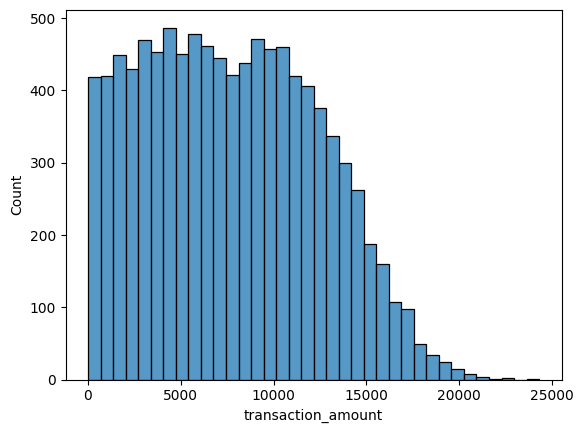

In [29]:
sns.histplot(joint_data_yes['transaction_amount'])

<Axes: xlabel='campaign_id', ylabel='Count'>

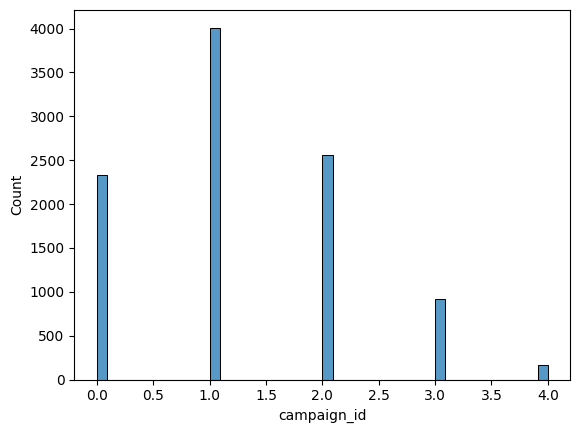

In [30]:
sns.histplot(joint_data_yes['campaign_id'])

In [31]:
#create a new column named 'average_purchase_value'
joint_data_yes['avg_purchase_per_transaction'] = joint_data_yes['transaction_amount']/joint_data_yes['transaction_id']
joint_data_yes.drop(columns=['campaign_id'])

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,avg_purchase_per_transaction
0,1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,584.913333
1,2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,675.702222
2,3,2021-06-01,2022-11-27,43,Other,North Latoyatown,192,73,25,6,1454.87,242.478333
3,4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,393.734000
4,5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,646.856250
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,549.820000
9996,9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,487.358333
9997,9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,1167.710000
9998,9999,2022-05-10,2022-07-15,31,Female,Andrewland,23,5,4,12,6721.86,560.155000


In [32]:
#create column 'customer_lifespan' in months
joint_data_yes['customer_lifespan'] = ((joint_data_yes['last_purchase_date'] - joint_data_yes['join_date']).dt.days / 365).round(2)

<Axes: xlabel='customer_lifespan', ylabel='Count'>

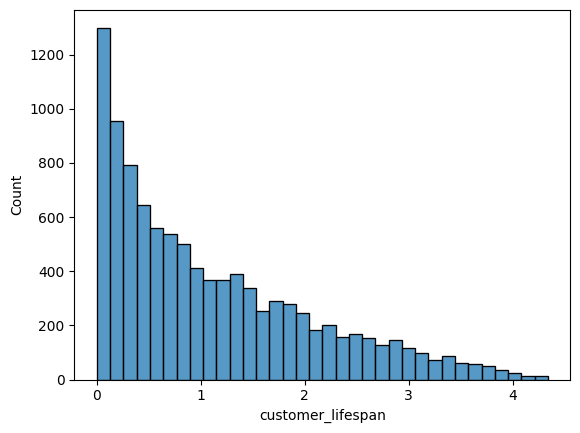

In [33]:
sns.histplot(joint_data_yes['customer_lifespan'])

In [34]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

#label encode categorical data
le = LabelEncoder()
joint_data_yes['gender']=le.fit_transform(joint_data_yes['gender'])
joint_data_yes['location']=le.fit_transform(joint_data_yes['location'])
joint_data_yes

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan
0,1,2023-11-20,2024-03-17,56,0,4747,10,15,1,6,3509.48,1.0,584.913333,0.32
1,2,2021-09-08,2023-10-25,43,1,2074,285,49,51,9,6081.32,2.0,675.702222,2.13
2,3,2021-06-01,2022-11-27,43,2,4613,192,73,25,6,1454.87,1.0,242.478333,1.49
3,4,2022-01-01,2022-09-01,29,1,1916,110,30,17,20,7874.68,1.0,393.734000,0.67
4,5,2022-01-24,2023-06-02,43,1,1433,161,2,7,24,15524.55,0.0,646.856250,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42,0,2384,119,47,16,10,5498.20,0.0,549.820000,0.66
9996,9997,2022-07-09,2023-01-25,26,1,2315,3,33,14,12,5848.30,1.0,487.358333,0.55
9997,9998,2023-09-17,2024-01-30,39,1,4017,53,17,5,3,3503.13,1.0,1167.710000,0.37
9998,9999,2022-05-10,2022-07-15,31,0,158,23,5,4,12,6721.86,0.0,560.155000,0.18


In [35]:
#check if there is zero value in customer_lifespan
joint_data_yes[joint_data_yes['customer_lifespan'] == 0]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan
353,354,2024-05-29,2024-05-29,30,0,3456,1,1,1,11,7567.83,1.0,687.984545,0.0
423,424,2021-06-02,2021-06-02,25,0,509,1,1,1,15,8869.24,2.0,591.282667,0.0
569,570,2024-03-23,2024-03-23,43,1,7360,1,1,1,18,12306.07,0.0,683.670556,0.0
845,846,2024-05-01,2024-05-02,52,1,5486,1,1,1,24,15395.06,2.0,641.460833,0.0
922,923,2023-12-30,2023-12-31,22,0,4621,1,1,1,4,4668.87,0.0,1167.217500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,9197,2024-05-31,2024-05-31,59,0,5153,1,1,1,22,13658.06,0.0,620.820909,0.0
9235,9236,2024-04-21,2024-04-22,26,0,5376,1,1,1,14,8384.90,2.0,598.921429,0.0
9654,9655,2024-03-23,2024-03-23,53,1,1671,1,1,1,2,1129.68,1.0,564.840000,0.0
9668,9669,2023-12-26,2023-12-27,58,1,4,1,1,1,13,8573.96,0.0,659.535385,0.0


In [36]:
df1 = joint_data_yes[joint_data_yes['customer_lifespan'] != 0]

In [37]:
df1

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan
0,1,2023-11-20,2024-03-17,56,0,4747,10,15,1,6,3509.48,1.0,584.913333,0.32
1,2,2021-09-08,2023-10-25,43,1,2074,285,49,51,9,6081.32,2.0,675.702222,2.13
2,3,2021-06-01,2022-11-27,43,2,4613,192,73,25,6,1454.87,1.0,242.478333,1.49
3,4,2022-01-01,2022-09-01,29,1,1916,110,30,17,20,7874.68,1.0,393.734000,0.67
4,5,2022-01-24,2023-06-02,43,1,1433,161,2,7,24,15524.55,0.0,646.856250,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42,0,2384,119,47,16,10,5498.20,0.0,549.820000,0.66
9996,9997,2022-07-09,2023-01-25,26,1,2315,3,33,14,12,5848.30,1.0,487.358333,0.55
9997,9998,2023-09-17,2024-01-30,39,1,4017,53,17,5,3,3503.13,1.0,1167.710000,0.37
9998,9999,2022-05-10,2022-07-15,31,0,158,23,5,4,12,6721.86,0.0,560.155000,0.18


In [38]:
df1.describe()

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan
count,9917.000000,9917,9917,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000
mean,5003.212363,2022-03-14 02:44:48.474337024,2023-04-23 20:27:07.750327808,43.431280,0.583846,3883.162448,100.941414,40.187355,19.882021,12.946254,7732.025829,1.257437,599.647430,1.111619
min,1.000000,2020-01-01 00:00:00,2020-01-28 00:00:00,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,23.810000,0.000000,23.810000,0.010000
25%,2503.000000,2021-02-12 00:00:00,2022-09-18 00:00:00,32.000000,0.000000,2008.000000,16.000000,7.000000,3.000000,7.000000,3834.220000,1.000000,488.283636,0.310000
50%,5001.000000,2022-03-11 00:00:00,2023-08-02 00:00:00,43.000000,1.000000,3885.000000,55.000000,22.000000,11.000000,13.000000,7491.590000,1.000000,587.604000,0.840000
75%,7509.000000,2023-04-20 00:00:00,2024-02-10 00:00:00,55.000000,1.000000,5812.000000,142.000000,58.000000,28.000000,19.000000,11268.610000,2.000000,692.856000,1.700000
max,10000.000000,2024-05-29 00:00:00,2024-05-31 00:00:00,69.000000,2.000000,7694.000000,711.000000,303.000000,142.000000,25.000000,24298.220000,4.000000,1997.080000,4.340000
std,2888.934812,NaN,NaN,14.318625,0.591517,2213.944403,118.771958,46.569310,23.006808,7.187642,4626.925117,0.971548,197.033911,0.973410


In [39]:
#Customer Lifetime Value = (transaction sum / Customer Lifespan)
#creating lifetime value per year per customer
df1['customer_lifetime_value'] = (df1['transaction_amount']/df1['customer_lifespan']).round(2)

/var/folders/hj/50ynckj97xq7d49_2_s66f100000gn/T/ipykernel_17864/875778639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['customer_lifetime_value'] = (df1['transaction_amount']/df1['customer_lifespan']).round(2)


In [40]:
df1

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan,customer_lifetime_value
0,1,2023-11-20,2024-03-17,56,0,4747,10,15,1,6,3509.48,1.0,584.913333,0.32,10967.12
1,2,2021-09-08,2023-10-25,43,1,2074,285,49,51,9,6081.32,2.0,675.702222,2.13,2855.08
2,3,2021-06-01,2022-11-27,43,2,4613,192,73,25,6,1454.87,1.0,242.478333,1.49,976.42
3,4,2022-01-01,2022-09-01,29,1,1916,110,30,17,20,7874.68,1.0,393.734000,0.67,11753.25
4,5,2022-01-24,2023-06-02,43,1,1433,161,2,7,24,15524.55,0.0,646.856250,1.35,11499.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42,0,2384,119,47,16,10,5498.20,0.0,549.820000,0.66,8330.61
9996,9997,2022-07-09,2023-01-25,26,1,2315,3,33,14,12,5848.30,1.0,487.358333,0.55,10633.27
9997,9998,2023-09-17,2024-01-30,39,1,4017,53,17,5,3,3503.13,1.0,1167.710000,0.37,9467.92
9998,9999,2022-05-10,2022-07-15,31,0,158,23,5,4,12,6721.86,0.0,560.155000,0.18,37343.67


In [89]:
#Transaction level of feature engineering using RFM to classify the customer value into 3 groups

import datetime as dt

# Convert transaction_date to datetime
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

# Calculate Recency, Frequency, and Monetary
snapshot_date = pd.Timestamp('2024-06-30 00:00:00')

# Recency: Days since last transaction
rfm_recency = customer['last_purchase_date'].reset_index()
rfm_recency['recency'] = (snapshot_date - rfm_recency['last_purchase_date']).dt.days
rfm_recency

,customer_id,last_purchase_date,recency
0,1,2024-03-17,105
1,2,2023-10-25,249
2,3,2022-11-27,581
3,4,2022-09-01,668
4,5,2023-06-02,394
...,...,...,...
9995,9996,2023-08-13,322
9996,9997,2023-01-25,522
9997,9998,2024-01-30,152
9998,9999,2022-07-15,716


In [90]:
# Frequency: Number of transactions
rfm_frequency = transactions.groupby('customer_id')['transaction_id'].count().reset_index()
rfm_frequency.columns = ['customer_id', 'frequency']

In [91]:
# Monetary: Total amount spent
rfm_monetary = df1[['customer_id','customer_lifetime_value']]
rfm_monetary.columns = ['customer_id', 'LTV']

In [92]:
# Merge RFM metrics into a single DataFrame
rfm = rfm_recency.merge(rfm_frequency, on='customer_id').merge(rfm_monetary, on='customer_id')

rfm.head()


,customer_id,last_purchase_date,recency,frequency,LTV
0,1,2024-03-17,105,6,10967.12
1,2,2023-10-25,249,9,2855.08
2,3,2022-11-27,581,6,976.42
3,4,2022-09-01,668,20,11753.25
4,5,2023-06-02,394,24,11499.67


In [191]:
# Define quantile thresholds for Recency, Frequency, and Monetary
quantiles = rfm[['recency', 'frequency', 'LTV']].quantile([0.25, 0.75]).to_dict()

# Define a function to assign scores based on quantiles
def rfm_score(x,a,b):
    if x <= a[b][0.25]:
        return 1
    elif x <= a[b][0.75]:
        return 2
    else:
        return 3

# Calculate R, F, M scores
rfm['R'] = rfm['recency'].apply(rfm_score, args=(quantiles, 'recency'))
rfm['F'] = rfm['frequency'].apply(rfm_score, args=(quantiles, 'frequency'))
rfm['M'] = rfm['LTV'].apply(rfm_score, args=(quantiles, 'LTV'))

# Calculate RFM score
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

# Classify customers into High, Medium, Low value categories
def classify_customer(rfm_score):
    if rfm_score > 5:
        return 'High'
    else:
        return 'Low'

rfm['Customer_Value_Level'] = rfm['RFM_Score'].apply(classify_customer)


rfm


,customer_id,last_purchase_date,recency,frequency,LTV,R,F,M,RFM_Score,Customer_Value_Level
0,1,2024-03-17,105,6,10967.12,1,1,2,4,Low
1,2,2023-10-25,249,9,2855.08,2,2,1,5,Low
2,3,2022-11-27,581,6,976.42,2,1,1,4,Low
3,4,2022-09-01,668,20,11753.25,3,3,2,8,High
4,5,2023-06-02,394,24,11499.67,2,3,2,7,High
...,...,...,...,...,...,...,...,...,...,...
9912,9996,2023-08-13,322,10,8330.61,2,2,2,6,High
9913,9997,2023-01-25,522,12,10633.27,2,2,2,6,High
9914,9998,2024-01-30,152,3,9467.92,2,1,2,5,Low
9915,9999,2022-07-15,716,12,37343.67,3,2,3,8,High


In [192]:
df2 = df1.merge(rfm, on='customer_id', how='left').drop(columns=['recency','frequency','LTV','R','F','M','RFM_Score','last_purchase_date_y'])
df2['Customer_Value_Level'] = df2['Customer_Value_Level'].apply(lambda x: 0 if x == 'Low' else 1)
#0 = low, 1 = medium, 2 = high
df2

,customer_id,join_date,last_purchase_date_x,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan,customer_lifetime_value,Customer_Value_Level
0,1,2023-11-20,2024-03-17,56,0,4747,10,15,1,6,3509.48,1.0,584.913333,0.32,10967.12,0
1,2,2021-09-08,2023-10-25,43,1,2074,285,49,51,9,6081.32,2.0,675.702222,2.13,2855.08,0
2,3,2021-06-01,2022-11-27,43,2,4613,192,73,25,6,1454.87,1.0,242.478333,1.49,976.42,0
3,4,2022-01-01,2022-09-01,29,1,1916,110,30,17,20,7874.68,1.0,393.734000,0.67,11753.25,1
4,5,2022-01-24,2023-06-02,43,1,1433,161,2,7,24,15524.55,0.0,646.856250,1.35,11499.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,9996,2022-12-16,2023-08-13,42,0,2384,119,47,16,10,5498.20,0.0,549.820000,0.66,8330.61,1
9913,9997,2022-07-09,2023-01-25,26,1,2315,3,33,14,12,5848.30,1.0,487.358333,0.55,10633.27,1
9914,9998,2023-09-17,2024-01-30,39,1,4017,53,17,5,3,3503.13,1.0,1167.710000,0.37,9467.92,0
9915,9999,2022-05-10,2022-07-15,31,0,158,23,5,4,12,6721.86,0.0,560.155000,0.18,37343.67,1


In [193]:
#Engagement level feature engineering
#create a column to get frequency on the customer's enegement level
engagement.reset_index()
engagement['avg_clicks_per_email'] = engagement['number_of_clicks']/engagement['number_of_emails_opened']
df2 = df2.merge(engagement, on='customer_id', how='left').drop(columns=['number_of_site_visits_y','number_of_emails_opened_y','number_of_clicks_y'])
df2

,customer_id,join_date,last_purchase_date_x,age,gender,location,number_of_site_visits_x,number_of_emails_opened_x,number_of_clicks_x,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan,customer_lifetime_value,Customer_Value_Level,avg_clicks_per_email
0,1,2023-11-20,2024-03-17,56,0,4747,10,15,1,6,3509.48,1.0,584.913333,0.32,10967.12,0,0.066667
1,2,2021-09-08,2023-10-25,43,1,2074,285,49,51,9,6081.32,2.0,675.702222,2.13,2855.08,0,1.040816
2,3,2021-06-01,2022-11-27,43,2,4613,192,73,25,6,1454.87,1.0,242.478333,1.49,976.42,0,0.342466
3,4,2022-01-01,2022-09-01,29,1,1916,110,30,17,20,7874.68,1.0,393.734000,0.67,11753.25,1,0.566667
4,5,2022-01-24,2023-06-02,43,1,1433,161,2,7,24,15524.55,0.0,646.856250,1.35,11499.67,1,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,9996,2022-12-16,2023-08-13,42,0,2384,119,47,16,10,5498.20,0.0,549.820000,0.66,8330.61,1,0.340426
9913,9997,2022-07-09,2023-01-25,26,1,2315,3,33,14,12,5848.30,1.0,487.358333,0.55,10633.27,1,0.424242
9914,9998,2023-09-17,2024-01-30,39,1,4017,53,17,5,3,3503.13,1.0,1167.710000,0.37,9467.92,0,0.294118
9915,9999,2022-05-10,2022-07-15,31,0,158,23,5,4,12,6721.86,0.0,560.155000,0.18,37343.67,1,0.800000


In [194]:
#marketing level of feature engineering
# Step 1: Count the number of "YES" responses for each customer
yes_responses = marketing[marketing['response'] == 'Yes'].groupby('customer_id').size().reset_index(name='yes_response_count')

# Step 2: Count the total number of campaigns received by each customer
total_campaigns = marketing.groupby('customer_id').size().reset_index(name='total_campaigns')

# Step 3: Merge the two dataframes and calculate the response rate
response_rate = yes_responses.merge(total_campaigns, on='customer_id', how='right')
response_rate['yes_response_count'].fillna(0, inplace=True)  # Fill NaN values with 0
response_rate['response_rate'] = response_rate['yes_response_count'] / response_rate['total_campaigns']
response_rate


/var/folders/hj/50ynckj97xq7d49_2_s66f100000gn/T/ipykernel_17864/2098333677.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  response_rate['yes_response_count'].fillna(0, inplace=True)  # Fill NaN values with 0


,customer_id,yes_response_count,total_campaigns,response_rate
0,1,1.0,4,0.25
1,2,2.0,4,0.50
2,3,1.0,2,0.50
3,4,1.0,4,0.25
4,5,0.0,4,0.00
...,...,...,...,...
9995,9996,0.0,3,0.00
9996,9997,1.0,1,1.00
9997,9998,1.0,1,1.00
9998,9999,0.0,2,0.00


In [195]:
final_df = df2.merge(response_rate, on='customer_id', how='left').drop(columns=['yes_response_count'])
final_df.drop(columns=['campaign_id','transaction_id','transaction_amount','number_of_emails_opened_x','number_of_clicks_x'])

,customer_id,join_date,last_purchase_date_x,age,gender,location,number_of_site_visits_x,avg_purchase_per_transaction,customer_lifespan,customer_lifetime_value,Customer_Value_Level,avg_clicks_per_email,total_campaigns,response_rate
0,1,2023-11-20,2024-03-17,56,0,4747,10,584.913333,0.32,10967.12,0,0.066667,4,0.25
1,2,2021-09-08,2023-10-25,43,1,2074,285,675.702222,2.13,2855.08,0,1.040816,4,0.50
2,3,2021-06-01,2022-11-27,43,2,4613,192,242.478333,1.49,976.42,0,0.342466,2,0.50
3,4,2022-01-01,2022-09-01,29,1,1916,110,393.734000,0.67,11753.25,1,0.566667,4,0.25
4,5,2022-01-24,2023-06-02,43,1,1433,161,646.856250,1.35,11499.67,1,3.500000,4,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,9996,2022-12-16,2023-08-13,42,0,2384,119,549.820000,0.66,8330.61,1,0.340426,3,0.00
9913,9997,2022-07-09,2023-01-25,26,1,2315,3,487.358333,0.55,10633.27,1,0.424242,1,1.00
9914,9998,2023-09-17,2024-01-30,39,1,4017,53,1167.710000,0.37,9467.92,0,0.294118,1,1.00
9915,9999,2022-05-10,2022-07-15,31,0,158,23,560.155000,0.18,37343.67,1,0.800000,2,0.00


<Axes: >

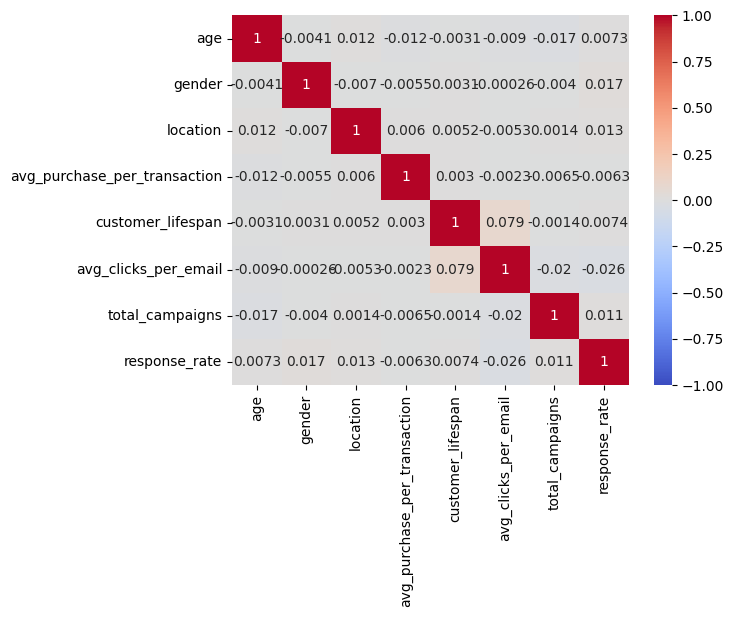

In [196]:
# Compute the correlation matrix
correlation_matrix = final_df[['age','gender','location','avg_purchase_per_transaction','customer_lifespan','avg_clicks_per_email','total_campaigns','response_rate']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

Modeling

<Axes: xlabel='Customer_Value_Level', ylabel='Count'>

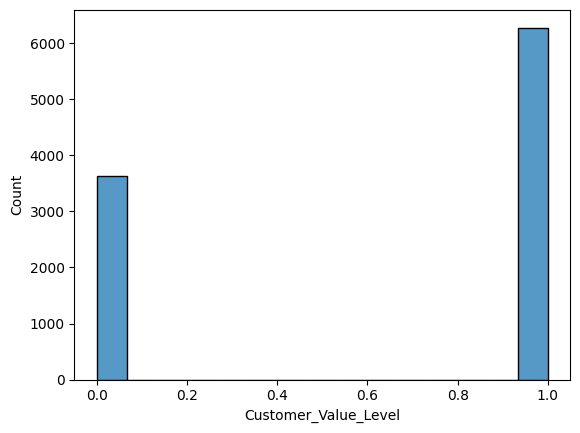

In [197]:
sns.histplot(final_df['Customer_Value_Level'])

In [198]:
final_df.groupby('Customer_Value_Level')['Customer_Value_Level'].count()/len(final_df)

Customer_Value_Level
0    0.366845
1    0.633155
Name: Customer_Value_Level, dtype: float64

In [199]:
X = final_df[['age','gender','location','number_of_site_visits_x','avg_purchase_per_transaction','avg_clicks_per_email','total_campaigns','response_rate']]

y = final_df['Customer_Value_Level']

In [200]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier


In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [202]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
#cross validation - divide dataset to 5 sections, train 4 sections and test 1 section, repeat the process 5 times
#quickly create 5 models and pick the best one

knn = KNeighborsClassifier()
log = LogisticRegression()

log.fit(X_train, y_train)
y_pred_rf = log.predict(X_test)


scores_log = cross_val_score(log, X_train, y_train, scoring='f1', cv=5)
scores_knn = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)


In [204]:
print(f'Cross-Validated Scores for Logistic Regression:{scores_log}')
print(f'Cross-Validated Scores for K Nearest Neighbor:{scores_knn}')

Cross-Validated Scores for Logistic Regression:[0.78787879 0.78199052 0.78240303 0.76974629 0.78126464]
Cross-Validated Scores for K Nearest Neighbor:[0.75826446 0.76772867 0.76705407 0.75847893 0.78393493]


In [205]:
#calculate average score
print(np.mean(scores_log))
print(np.mean(scores_knn))

0.7806566527470473
0.7670922124297718


In [206]:
#building an actual model

KNN = knn.fit(X_train, y_train)
LOG = log.fit(X_train, y_train)


In [207]:

y_pred_knn=KNN.predict(X_test)
y_pred_log = LOG.predict(X_test)

In [208]:
from sklearn.metrics import accuracy_score

# Logreg score
print(accuracy_score(y_test, y_pred_log))
print(precision_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))


0.6569220430107527
0.6590380139643134
0.7689522516406426


In [209]:
#knn score
print(accuracy_score(y_test,y_pred_knn))
print(precision_score(y_test,y_pred_knn))
print(f1_score(y_test,y_pred_knn))

0.6619623655913979
0.688317546233649
0.7520946278955151
